In [150]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
import category_encoders as ce

In [154]:
df = pd.read_csv("all_car.csv")

In [156]:
df.dropna(inplace=True) ## boş sütunları sildim.

In [157]:
df.isnull().sum() ## şu an boş sütun yok.

Unnamed: 0    0
_id           0
Id            0
Marka         0
Seri          0
Model         0
Yıl           0
Km            0
Renk          0
Vites         0
Yakıt         0
Sehir         0
Tarih         0
Fiyat         0
dtype: int64

In [160]:
df["Tarih"] = df["Tarih"].apply(lambda x: pd.to_datetime(x, format='%d %B %Y', errors='coerce'))


In [161]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['Id'])
df = df.drop(columns=['Tarih'])
df = df.drop(columns= ["_id"])
df = df.drop(columns= ["Seri"])
df = df.drop(columns= ["Sehir"])

In [162]:
df["Yas"] = 2024 -df["Yıl"]

In [163]:
df = df.drop(columns= ["Yıl"])

In [164]:
df['Fiyat'] = df['Fiyat'].str.replace(r'\D', '', regex=True) ##Burada fiyat sütununu güncelledim.(Tl yazısı çıkartıldı ve ifade int'e dönüştü.)
df['Fiyat'] = df['Fiyat'].astype(int)

In [165]:
df['Km'] = df['Km'].str.replace('[,.]', '', regex=True)  # Virgüllü veya noktalı ifadeleri Km değişkeninin içinden çıkardım. 
df['Km'] = df['Km'].fillna(0).astype(int)  # Km değişkenindeki boş değerleri silmiştim zaten ama işimi garantiye aldım ve ifadeyi de int'e dönüştürdüm.

In [166]:
df_fiyat = df["Fiyat"]
Q1 = df_fiyat.quantile(0.25)
Q3 = df_fiyat.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
df = df[(df['Fiyat'] >= alt_sinir) & (df['Fiyat'] <= ust_sinir)] ## Aykırı gözlem analizi sonucu fiyat değişkenim bağımlı değişken olduğu için aykırı olanları verdiğim aralıklara tanımladım ve üste çıkmasını istemedim.

In [167]:
df_km = df["Km"]
Q1 = df_km.quantile(0.25)
Q3 = df_km.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
df = df[(df['Km'] >= alt_sinir) & (df['Km'] <= ust_sinir)] ##Aykırı gözlem analizi sonucu fiyat değişkenim bağımlı değişken olduğu için aykırı olanları verdiğim aralıklara tanımladım ve üste çıkmasını istemedim.

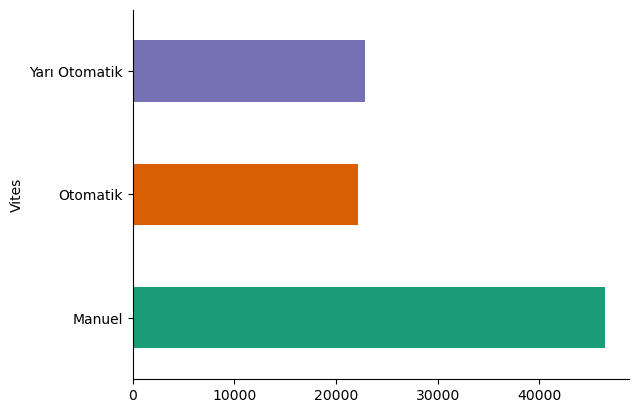

In [168]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Vites').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

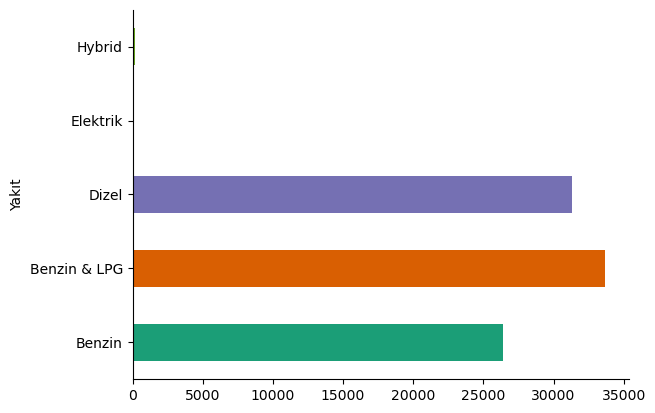

In [178]:
from matplotlib import pyplot as plt
import seaborn as sns
yakıt_gozlem_sayısı = df.groupby('Yakıt').size().sort_values(ascending=False)
df.groupby('Yakıt').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

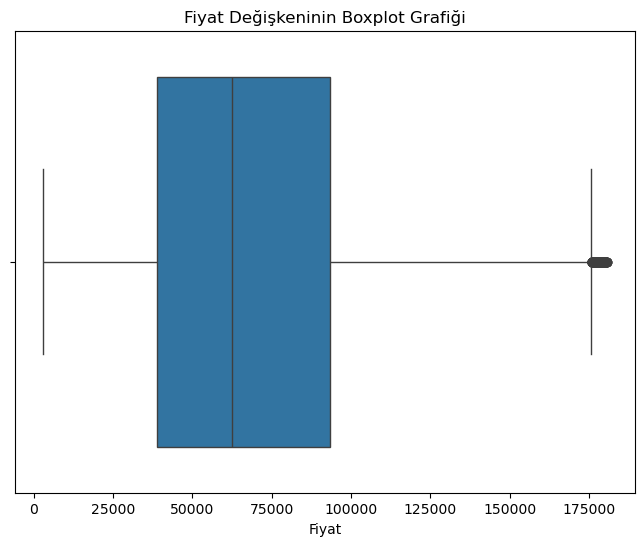

In [179]:
df = pd.DataFrame(data=df)
df_fiyat = df["Fiyat"]
Q1 = df_fiyat.quantile(0.25)
Q3 = df_fiyat.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
df = df[(df['Fiyat'] >= alt_sinir) & (df['Fiyat'] <= ust_sinir)]
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fiyat'])
plt.title('Fiyat Değişkeninin Boxplot Grafiği')
plt.xlabel('Fiyat')
plt.show()

C:\Users\Ali\AppData\Local\Temp\ipykernel_16916\2207127536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marka', y='Fiyat', data=df, palette='viridis')


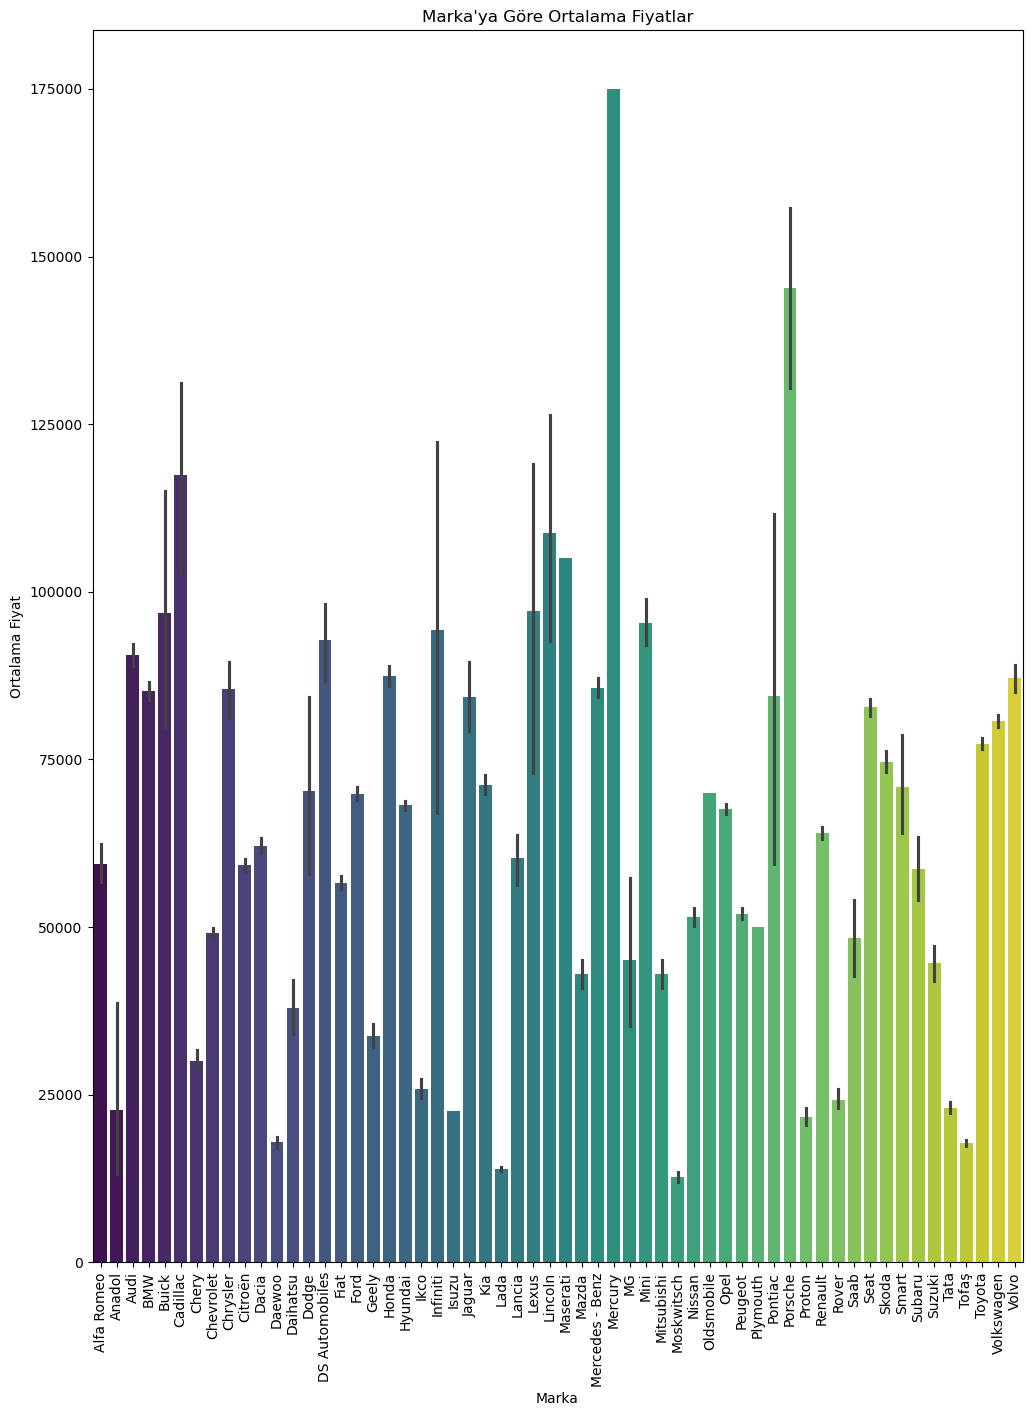

In [180]:
plt.figure(figsize=(12, 16))
sns.barplot(x='Marka', y='Fiyat', data=df, palette='viridis')
plt.title('Marka\'ya Göre Ortalama Fiyatlar')
plt.xlabel('Marka')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=90)
plt.show()

C:\Users\Ali\AppData\Local\Temp\ipykernel_16916\4243351305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Yakıt', y='Fiyat', data=df, palette='viridis')


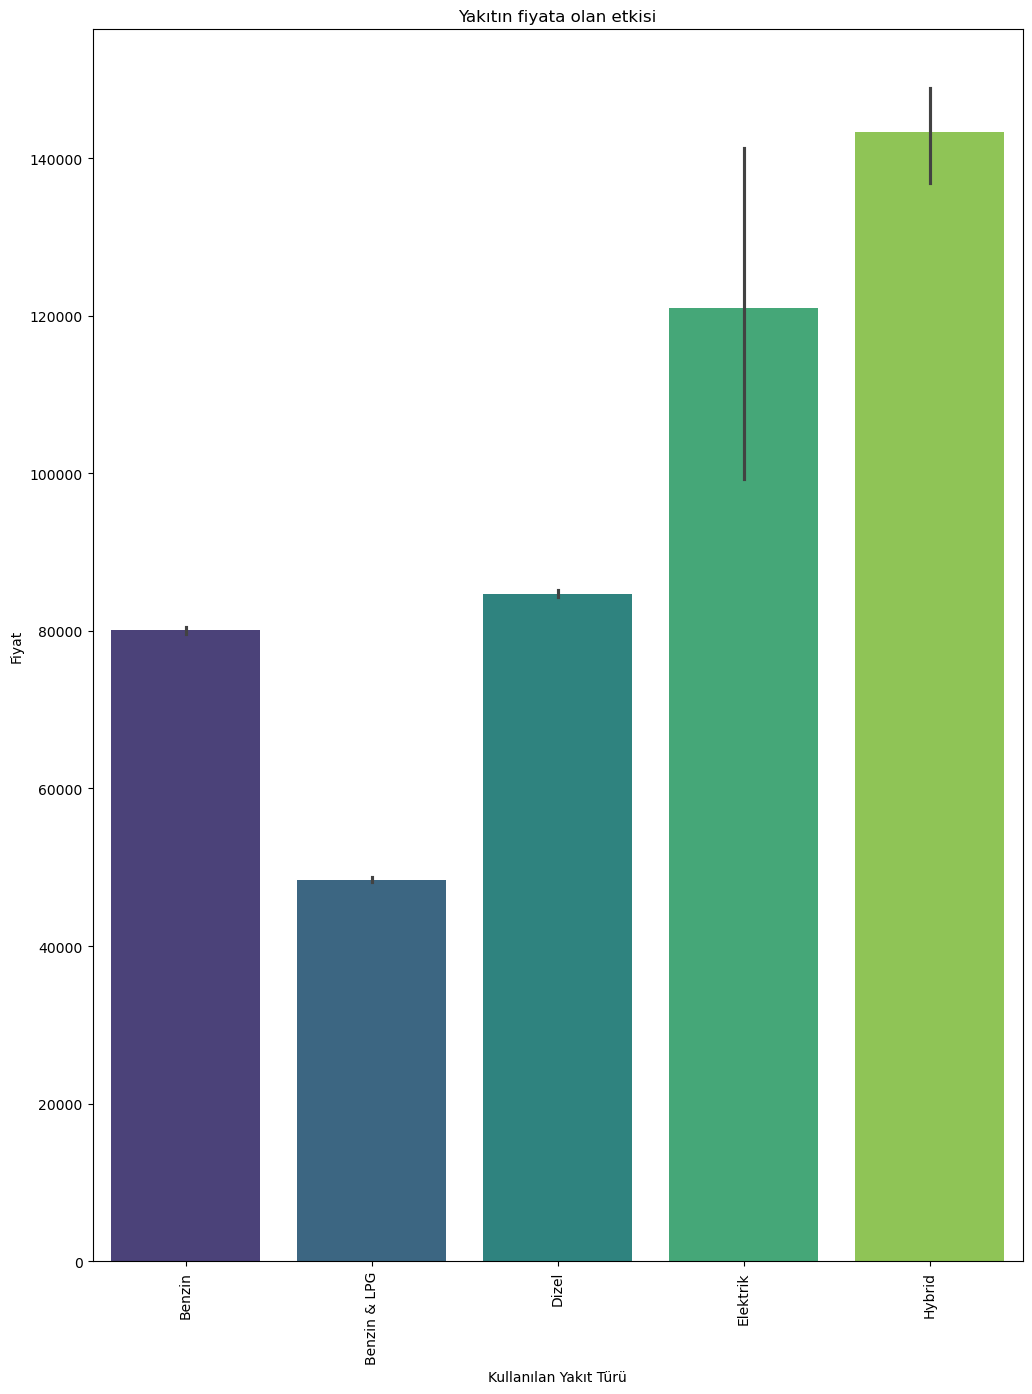

In [181]:
plt.figure(figsize=(12, 16))
sns.barplot(x='Yakıt', y='Fiyat', data=df, palette='viridis')
plt.title('Yakıtın fiyata olan etkisi')
plt.xlabel('Kullanılan Yakıt Türü')
plt.ylabel('Fiyat')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Yakıt', ylabel='Fiyat'>

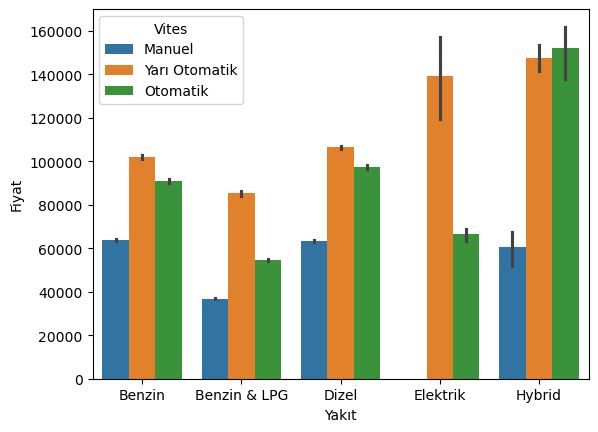

In [184]:
sns.barplot(df,y="Fiyat",x="Yakıt",hue="Vites")

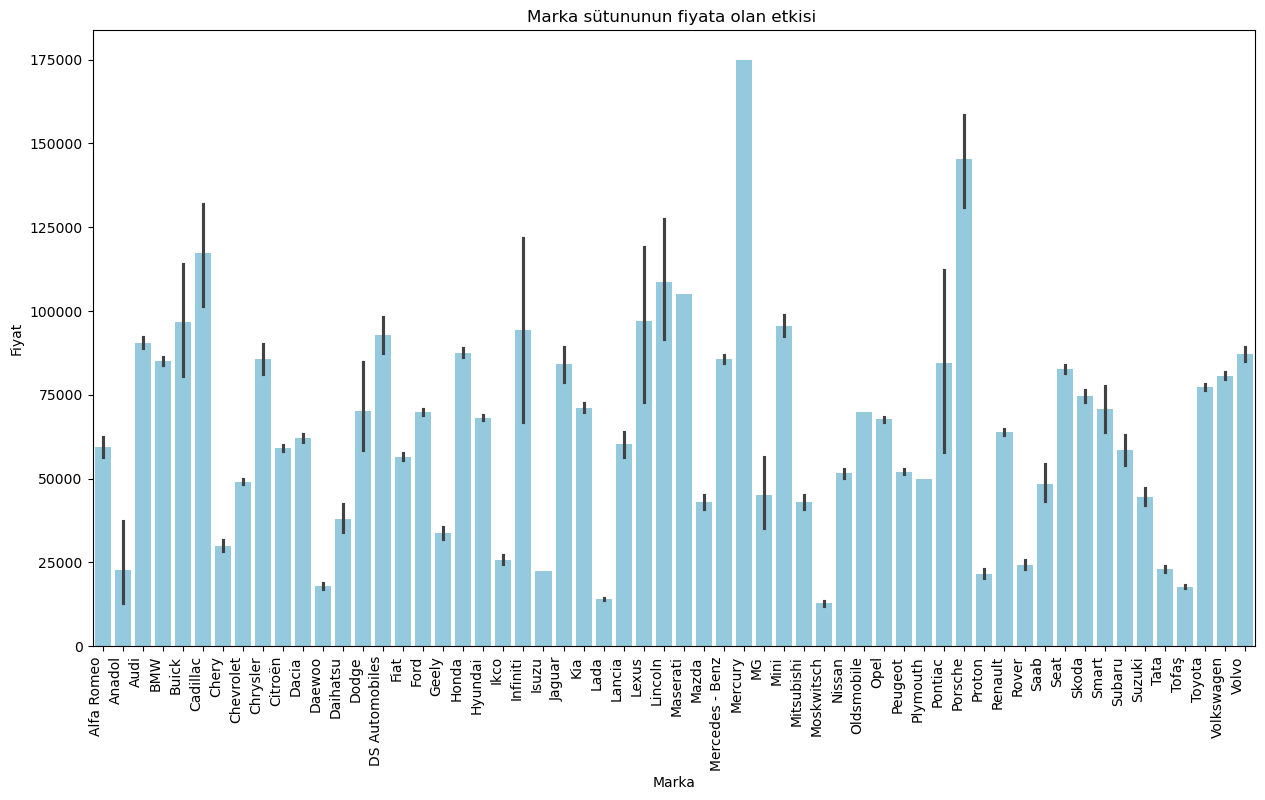

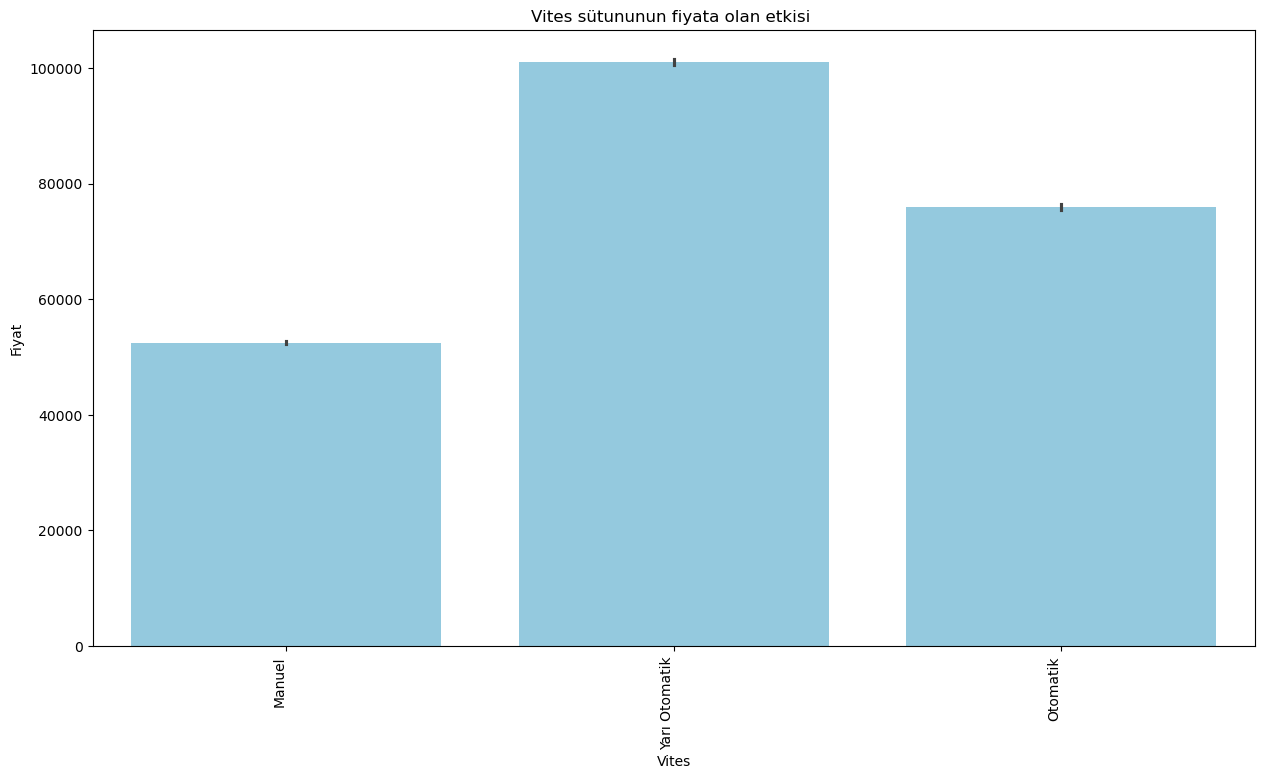

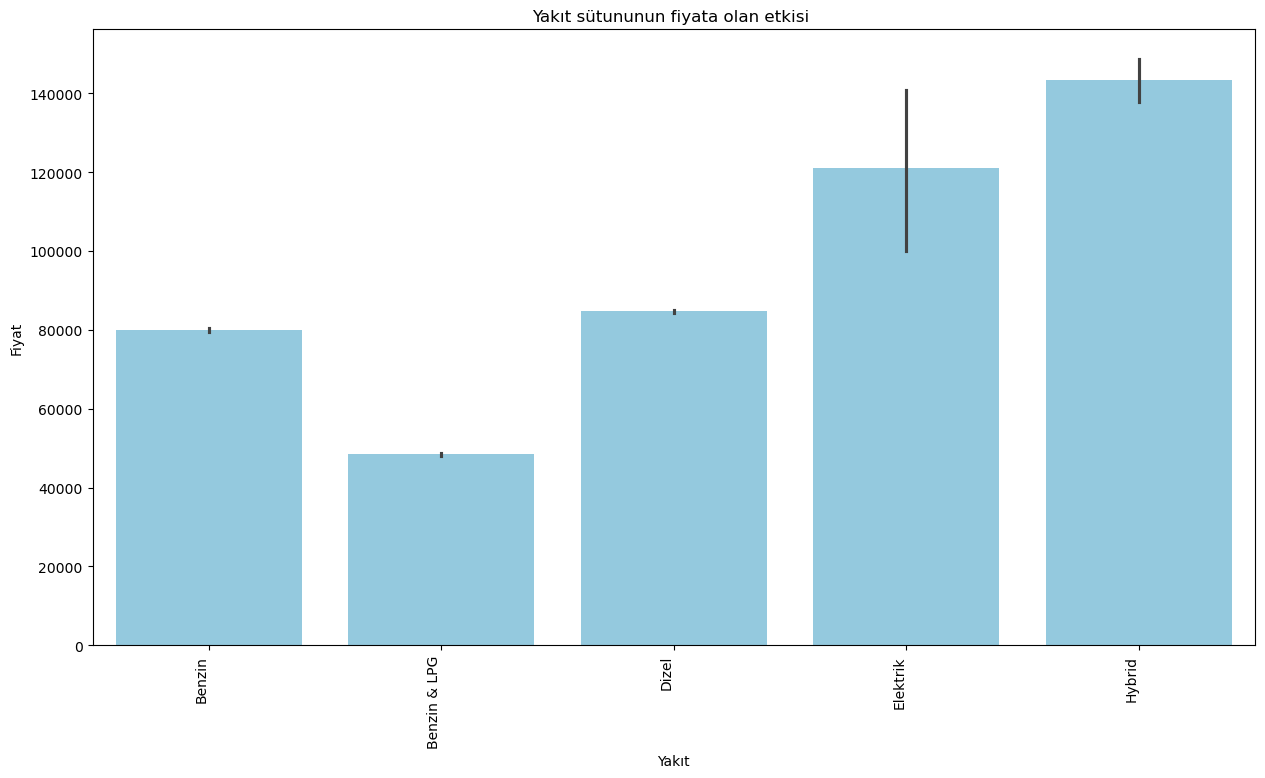

In [185]:
categorical_columns = ['Marka', 'Vites', 'Yakıt']
for column in categorical_columns:
    plt.figure(figsize=(15, 8))
    sns.barplot(x=column, y='Fiyat', data=df, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Fiyat')
    plt.title(f'{column} sütununun fiyata olan etkisi ')
    plt.xticks(rotation=90, ha='right')

    plt.show()

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Örnek sütun adları
column_names = ["Model"]

# Sütun adlarını metin belgesi olarak ele alıyoruz
corpus = [" ".join(column_names)]

# TF-IDF vektörleştirici oluşturma
vectorizer = TfidfVectorizer()

# Sütun adlarını TF-IDF vektörlerine dönüştürme
X = vectorizer.fit_transform(corpus)

# Elde edilen TF-IDF matrisini görüntüleme
print("TF-IDF Matrisi:")
print(X.toarray())

# Kullanılan öznitelik isimlerini görüntüleme (sütun başlıkları)
print("Öznitelik İsimleri:")
print(vectorizer.get_feature_names_out())

TF-IDF Matrisi:
[[1.]]
Öznitelik İsimleri:
['model']


In [192]:

## Dumie tuzağına yakalanmamak için kategorik değişkenleri 0-
df = pd.get_dummies(df, columns=['Vites', 'Yakıt','Marka','Model','Renk'], dtype=int)
X = df.drop(columns=['Fiyat'] , axis=1 )
y = df['Fiyat'] ## Bağımlı ve Bağımsız değişkenleri ayırdım (Fiyat bağımlı değişken oldu alttaki kodda, x tarafında da fiyat dışındaki değerleri bağımsız değişken olarak ayırdım.)

In [194]:
df


Km   Fiyat  Yas  Vites_Manuel  Vites_Otomatik  Vites_Yarı Otomatik  \
0      200000   33000   21             1               0                    0   
1      330000   23500   26             1               0                    0   
2      158380   84900   13             1               0                    0   
3      305000   25500   24             1               0                    0   
4      105500   76500   13             1               0                    0   
...       ...     ...  ...           ...             ...                  ...   
99119  202000  122000   14             0               1                    0   
99121  156470  115000   12             0               1                    0   
99122  211000   85000   14             0               1                    0   
99127  397500   91000   14             0               1                    0   
99130  144000  108000   10             0               1                    0   

       Yakıt_Benzin  Yakıt_Benzin & LPG  Yakıt_Dizel  Yakıt_Elektrik  \
0                 1                   0            0               0   
1                 1                   0            0               0   
2                 1                   0            0               0   
3                 1                   0            0               0   
4                 1                   0            0               0   
...             ...                 ...          ...             ...   
99119             0                   0            1               0   
99121             0                   0            1               0   
99122             0                   0            1               0   
99127             0                   0            1               0   
99130             0                   0            1               0   

       Yakıt_Hybrid  Marka_Alfa Romeo  Marka_Anadol  Marka_Audi  Marka_BMW  \
0                 0                 1             0           0          0   
1                 0                 1             0           0          0   
2                 0                 1             0           0          0   
3                 0                 1             0           0          0   
4                 0                 1             0           0          0   
...             ...               ...           ...         ...        ...   
99119             0                 0             0           0          0   
99121             0                 0             0           0          0   
99122             0                 0             0           0          0   
99127             0                 0             0           0          0   
99130             0                 0             0           0          0   

       Marka_Buick  Marka_Cadillac  Marka_Chery  Marka_Chevrolet  \
0                0               0            0                0   
1                0               0            0                0   
2                0               0            0                0   
3                0               0            0                0   
4                0               0            0                0   
...            ...             ...          ...              ...   
99119            0               0            0                0   
99121            0               0            0                0   
99122            0               0            0                0   
99127            0               0            0                0   
99130            0               0            0                0   

       Marka_Chrysler  Marka_Citroën  Marka_DS Automobiles  Marka_Dacia  \
0                   0              0                     0            0   
1                   0              0                     0            0   
2                   0              0                     0            0   
3                   0              0                     0            0   
4                   0              0        

In [196]:
output_file = 'sadece_sutun_adlari.csv'
pd.DataFrame(df.columns).to_csv(output_file, index=False, header=False)

print(f"Sadece sütun adlarıyla oluşturulan CSV dosyası: {output_file}")

Sadece sütun adlarıyla oluşturulan CSV dosyası: sadece_sutun_adlari.csv


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
# Lineer Regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Model performansını değerlendirme
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 110852002.03101127
R-squared (R2): 0.9266484470268257


In [25]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

9842.730984150321

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

10528.627737317493

In [27]:
## Modelin öğrenme başarısı (0-1.0)
model.score(X_train, y_train)

0.9361690680745312

In [200]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred= rfr.predict(X_test)
r2= r2_score(y_test, pred)
r2

0.9303178995035664

In [29]:
rfr.predict(X_test)

array([ 50285.21,  14927.  ,  34852.  , ..., 156314.75,  68452.99,
        28812.  ])

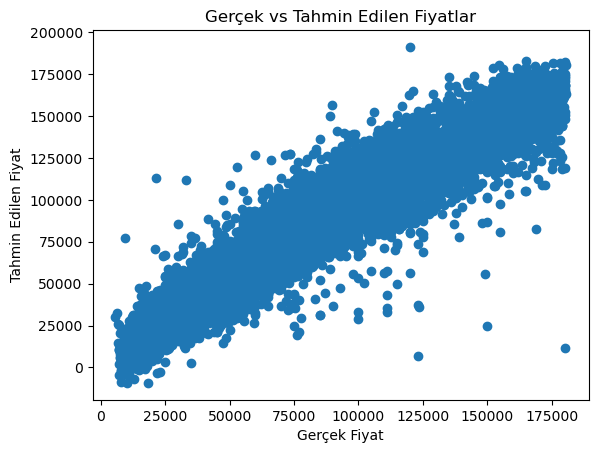

In [30]:
import matplotlib.pyplot as plt

# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi görselleştirme
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen Fiyatlar")
plt.show()

In [202]:
import pickle as pk
pk.dump(rfr,open("arabatahmin.pkl","wb"))

In [32]:
pd.set_option('display.max_columns', None)
df.columns

Index(['Km', 'Fiyat', 'Vites_Manuel', 'Vites_Otomatik', 'Vites_Yarı Otomatik',
       'Yakıt_Benzin', 'Yakıt_Benzin & LPG', 'Yakıt_Dizel', 'Yakıt_Elektrik',
       'Yakıt_Hybrid',
       ...
       'Yas_45', 'Yas_46', 'Yas_47', 'Yas_48', 'Yas_49', 'Yas_50', 'Yas_51',
       'Yas_52', 'Yas_53', 'Yas_54'],
      dtype='object', length=3422)

In [33]:


# Kategorik değişkenleri dummy kodlama yaparak dönüştürme

test_features = {
    'Marka' : ['Alfa Romeo','Dacia','Fiat','Audi','Peugeot','Hyundai'],
    'Model' : ['1.6 TS Distinctive','1.5 dCi Stepway','1.2 EL','A3 Sportback 1.6 TDI','1.4 Comfort','1.4 CRDi Team'],
    'Km' : ['200000','30000','140000','125000','110000','190000'],
    'Renk' : ['Gümüş Gri','Beyaz','Gümüş Gri','Beyaz','Gümüş Gri','Siyah'],
    'Yas' : ['21','6','19','12','15','13'],
    'Vites': ['Manuel','Manuel','Manuel','Yarı Otomatik','Manuel','Manuel'],
    'Yakıt': ['Benzin','Dizel','Benzin','Dizel','Benzin','Dizel']
    
    }
new_data = []
for i in range(len(test_features['Marka'])):
    car = {
        'Marka': test_features['Marka'][i],
        'Model': test_features['Model'][i],
        'Km': test_features['Km'][i],
        'Renk': test_features['Renk'][i],
        'Yas' : test_features['Yas'][i],
        'Vites': test_features['Vites'][i],
        'Yakıt': test_features['Yakıt'][i]
    }
    new_data.append(car)
test_df = pd.DataFrame(new_data)
test_df

Marka                 Model      Km       Renk Yas          Vites  \
0  Alfa Romeo    1.6 TS Distinctive  200000  Gümüş Gri  21         Manuel   
1       Dacia       1.5 dCi Stepway   30000      Beyaz   6         Manuel   
2        Fiat                1.2 EL  140000  Gümüş Gri  19         Manuel   
3        Audi  A3 Sportback 1.6 TDI  125000      Beyaz  12  Yarı Otomatik   
4     Peugeot           1.4 Comfort  110000  Gümüş Gri  15         Manuel   
5     Hyundai         1.4 CRDi Team  190000      Siyah  13         Manuel   

    Yakıt  
0  Benzin  
1   Dizel  
2  Benzin  
3   Dizel  
4  Benzin  
5   Dizel

In [34]:
test_df = pd.get_dummies(test_df, columns=['Vites', 'Yakıt', 'Marka', 'Model', 'Renk','Yas'],dtype=int)

In [35]:
df_req = pd.DataFrame(columns=[f'Column_{i}' for i in range(3422)])
required_columns = []
for column_name in df.columns:
    required_columns.append(column_name)


In [36]:
for col in required_columns:
    if col not in test_df.columns:
        test_df[col] = 0

C:\Users\Ali\AppData\Local\Temp\ipykernel_16916\3943066317.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\Ali\AppData\Local\Temp\ipykernel_16916\3943066317.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = 0
C:\Users\Ali\AppData\Local\Temp\ipykernel_16916\3943066317.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

In [37]:
df

Km   Fiyat  Vites_Manuel  Vites_Otomatik  Vites_Yarı Otomatik  \
0      200000   33000             1               0                    0   
1      330000   23500             1               0                    0   
2      158380   84900             1               0                    0   
3      305000   25500             1               0                    0   
4      105500   76500             1               0                    0   
...       ...     ...           ...             ...                  ...   
99119  202000  122000             0               1                    0   
99121  156470  115000             0               1                    0   
99122  211000   85000             0               1                    0   
99127  397500   91000             0               1                    0   
99130  144000  108000             0               1                    0   

       Yakıt_Benzin  Yakıt_Benzin & LPG  Yakıt_Dizel  Yakıt_Elektrik  \
0                 1                   0            0               0   
1                 1                   0            0               0   
2                 1                   0            0               0   
3                 1                   0            0               0   
4                 1                   0            0               0   
...             ...                 ...          ...             ...   
99119             0                   0            1               0   
99121             0                   0            1               0   
99122             0                   0            1               0   
99127             0                   0            1               0   
99130             0                   0            1               0   

       Yakıt_Hybrid  Marka_Alfa Romeo  Marka_Anadol  Marka_Audi  Marka_BMW  \
0                 0                 1             0           0          0   
1                 0                 1             0           0          0   
2                 0                 1             0           0          0   
3                 0                 1             0           0          0   
4                 0                 1             0           0          0   
...             ...               ...           ...         ...        ...   
99119             0                 0             0           0          0   
99121             0                 0             0           0          0   
99122             0                 0             0           0          0   
99127             0                 0             0           0          0   
99130             0                 0             0           0          0   

       Marka_Buick  Marka_Cadillac  Marka_Chery  Marka_Chevrolet  \
0                0               0            0                0   
1                0               0            0                0   
2                0               0            0                0   
3                0               0            0                0   
4                0               0            0                0   
...            ...             ...          ...              ...   
99119            0               0            0                0   
99121            0               0            0                0   
99122            0               0            0                0   
99127            0               0            0                0   
99130            0               0            0                0   

       Marka_Chrysler  Marka_Citroën  Marka_DS Automobiles  Marka_Dacia  \
0                   0              0                     0            0   
1                   0              0                     0            0   
2                   0              0                     0            0   
3                   0              0                     0            0   
4                   0              0                     0            0   
...               ...        

In [38]:
test_df

Km  Vites_Manuel  Vites_Yarı Otomatik  Yakıt_Benzin  Yakıt_Dizel  \
0  200000             1                    0             1            0   
1   30000             1                    0             0            1   
2  140000             1                    0             1            0   
3  125000             0                    1             0            1   
4  110000             1                    0             1            0   
5  190000             1                    0             0            1   

   Marka_Alfa Romeo  Marka_Audi  Marka_Dacia  Marka_Fiat  Marka_Hyundai  \
0                 1           0            0           0              0   
1                 0           0            1           0              0   
2                 0           0            0           1              0   
3                 0           1            0           0              0   
4                 0           0            0           0              0   
5                 0           0            0           0              1   

   Marka_Peugeot  Model_1.2 EL  Model_1.4 CRDi Team  Model_1.4 Comfort  \
0              0             0                    0                  0   
1              0             0                    0                  0   
2              0             1                    0                  0   
3              0             0                    0                  0   
4              1             0                    0                  1   
5              0             0                    1                  0   

   Model_1.5 dCi Stepway  Model_1.6 TS Distinctive  \
0                      0                         1   
1                      1                         0   
2                      0                         0   
3                      0                         0   
4                      0                         0   
5                      0                         0   

   Model_A3 Sportback 1.6 TDI  Renk_Beyaz  Renk_Gümüş Gri  Renk_Siyah  Yas_12  \
0                           0           0               1           0       0   
1                           0           1               0           0       0   
2                           0           0               1           0       0   
3                           1           1               0           0       1   
4                           0           0               1           0       0   
5                           0           0               0           1       0   

   Yas_13  Yas_15  Yas_19  Yas_21  Yas_6  Fiyat  Vites_Otomatik  \
0       0       0       0       1      0      0               0   
1       0       0       0       0      1      0               0   
2       0       0       1       0      0      0               0   
3       0       0       0       0      0      0               0   
4       0       1       0       0      0      0               0   
5       1       0       0       0      0      0               0   

   Yakıt_Benzin & LPG  Yakıt_Elektrik  Yakıt_Hybrid  Marka_Anadol  Marka_BMW  \
0                   0               0             0             0          0   
1                   0               0             0             0          0   
2                   0               0             0             0          0   
3                   0               0             0             0          0   
4                   0               0             0             0          0   
5                   0               0             0             0          0   

   Marka_Buick  Marka_Cadillac  Marka_Chery  Marka_Chevrolet  Marka_Chrysler  \
0            0               0            0                0               0   
1            0               0            0                0               0   
2            0               0            0                0               0   
3            0               0            0                0               0   
4            0               0            0               

In [39]:
test_df = test_df.reindex(columns=df.columns)

In [40]:
test_df = test_df.drop(["Fiyat"],axis=1)

In [41]:
predicted_price = rfr.predict(test_df)
print("Tahmin edilen Fiyat:", predicted_price)

Tahmin edilen Fiyat: [ 33360.5   90504.98  30020.   111677.5   50292.5   41247.49]
